In [1]:
import numpy as np
import dicom
import sys
sys.path.append('..')
import os
from AlgoEngine.utils import getVolume, getContours, getImageBlock, convertROIToCTSpace, getMeanTargetDose
from General.testing_utils import getContourInputs
from AlgoEngine.sts import getSTSHistogram
from math import sqrt
import time
import matplotlib.pyplot as plt

## Inputs to Function

In [2]:
BASE_DIR = '/home/radiation/RadiationTherapyDecisionSupport/data/'
StudyID = 'UCLA_PR_6'
_, sop_ids = getImageBlock(StudyID, BASE_DIR)
n_bins = 10

In [3]:
ROI_NAME = 'PTV'
block_shape, contour_data, image_orientation, image_position, pixel_spacing = getContourInputs(BASE_DIR, StudyID, ROI_NAME, excluding=[])
ptv_contour_block, ptv_roi_block = getContours(block_shape, contour_data, image_orientation, image_position, pixel_spacing)
ptv_contour_block = convertROIToCTSpace(ptv_contour_block, image_position, sop_ids)
ptv_roi_block = convertROIToCTSpace(ptv_roi_block, image_position, sop_ids)

In [4]:
ROI_NAME = 'Bladder'
block_shape, contour_data, image_orientation, image_position, pixel_spacing = getContourInputs(BASE_DIR, StudyID, ROI_NAME, excluding=[])
_, oar_roi_block = getContours(block_shape, contour_data, image_orientation, image_position, pixel_spacing)
oar_roi_block = convertROIToCTSpace(oar_roi_block, image_position, sop_ids)

## Function Goes Here

In [5]:
elevation_bins, distance_bins, azimuth_bins, amounts = getSTSHistogram(ptv_roi_block, oar_roi_block, n_bins)

## Testing the Function

We assert that the probabilities sum up to 0 by the last point in the matrix. 

We also plot histograms for the 2D cases (e.g. elevation vs percent, distance vs percent, etc)

In [8]:
print(np.allclose(np.sum(amounts[:, 3]), 1.0))

True


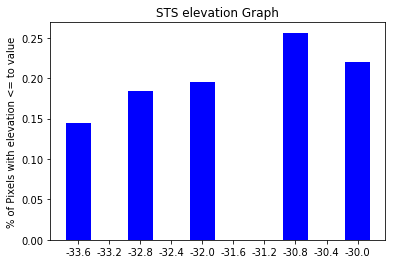

In [10]:
bin_vals = elevation_bins
bin_amts = np.zeros((bin_vals.shape[0] - 1)).astype(np.float32)

for n in range(0, bin_vals.shape[0] - 1):    
    bin_amts[n] = np.sum(amounts[amounts[:, 0] == bin_vals[n], 3])
    
plt.bar(np.arange(n_bins), bin_amts, align='center', color='blue')
plt.xticks(np.arange(n_bins), np.around(bin_vals[1:], decimals=1))
plt.ylabel("% of Pixels with elevation <= to value")
plt.title("STS elevation Graph")
plt.show()

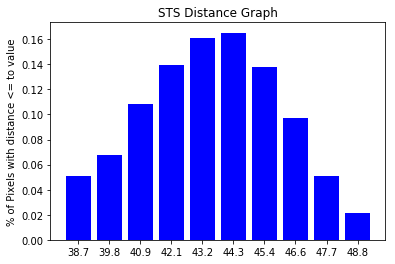

In [11]:
bin_vals = distance_bins
bin_amts = np.zeros((bin_vals.shape[0] - 1)).astype(np.float32)

for n in range(0, bin_vals.shape[0] - 1):    
    bin_amts[n] = np.sum(amounts[amounts[:, 1] == bin_vals[n], 3])
    
plt.bar(np.arange(n_bins), bin_amts, align='center', color='blue')
plt.xticks(np.arange(n_bins), np.around(bin_vals[1:], decimals=1))
plt.ylabel("% of Pixels with distance <= to value")
plt.title("STS Distance Graph")
plt.show()

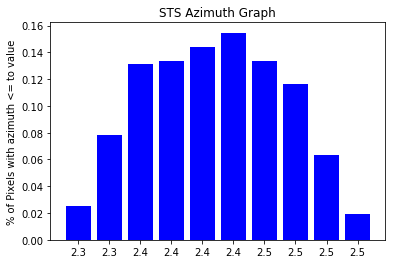

In [12]:
bin_vals = azimuth_bins
bin_amts = np.zeros((bin_vals.shape[0] - 1)).astype(np.float32)

for n in range(0, bin_vals.shape[0] - 1):    
    bin_amts[n] = np.sum(amounts[amounts[:, 2] == bin_vals[n], 3])
    
plt.bar(np.arange(n_bins), bin_amts, align='center', color='blue')
plt.xticks(np.arange(n_bins), np.around(bin_vals[1:], decimals=1))
plt.ylabel("% of Pixels with azimuth <= to value")
plt.title("STS Azimuth Graph")
plt.show()

In [13]:
bin_vals

array([ 2.28349202,  2.30887999,  2.33426797,  2.35965594,  2.38504391,
        2.41043189,  2.43581986,  2.46120783,  2.48659581,  2.51198378,
        2.53737176])